<a href="https://colab.research.google.com/github/Shriyash11/GIRME/blob/main/using%20multi%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Step 1: Data Collection
# Load the dataset
file_path = "/content/mmds.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

Original Dataset:
   CustomerID  Income   Debt PaymentHistory  CreditScore
0          18   50000  10000           Good          700
1          65   60000   8000      Excellent          750
2          46   75000  12000           Poor          600
3          37   45000  15000           Good          680
4          36   80000   5000      Excellent          780


In [ ]:
# Step 2: Data Preparation
# Identify features and target variable
features = df.drop(columns=['CustomerID', 'CreditScore'])
target = df['CreditScore']

In [ ]:
# Handle categorical variables (PaymentHistory)
label_encoder = LabelEncoder()
features['PaymentHistory'] = label_encoder.fit_transform(features['PaymentHistory'])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Display the processed data
print("\nProcessed Data:")
print("X_train_scaled:")
print(X_train_scaled[:5])  # Display the first 5 rows for demonstration
print("\nX_test_scaled:")
print(X_test_scaled[:5])   # Display the first 5 rows for demonstration
print("\ny_train:")
print(y_train.head())      # Display the first 5 rows for demonstration
print("\ny_test:")
print(y_test.head())       # Display the first 5 rows for demonstration


Processed Data:
X_train_scaled:
[[ 1.27769034  1.59508739 -1.32424438]
 [-0.82262255  2.07123289  1.08347268]
 [ 0.2275339   0.16665092 -0.12038585]
 [ 1.27769034 -1.4998583   1.08347268]
 [ 1.27769034 -0.30949457 -0.12038585]]

X_test_scaled:
[[ 0.92763819 -1.4998583  -1.32424438]
 [-0.4725704   1.59508739 -0.12038585]
 [ 0.57758604 -0.78564006 -1.32424438]
 [-1.17267469 -0.30949457 -0.12038585]
 [-0.82262255  1.59508739  1.08347268]]

y_train:
22    770
5     620
33    700
56    590
66    700
Name: CreditScore, dtype: int64

y_test:
4     780
63    710
10    770
0     700
35    620
Name: CreditScore, dtype: int64


In [ ]:
print(features)

    Income   Debt  PaymentHistory
0    50000  10000               1
1    60000   8000               0
2    75000  12000               2
3    45000  15000               1
4    80000   5000               0
..     ...    ...             ...
70   55000   8000               0
71   65000  12000               2
72   90000  10000               1
73   60000  15000               0
74   75000   7000               2

[75 rows x 3 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 3: Regression Model for Credit Score Prediction
# Choose a regression algorithm (Linear Regression in this case)
regression_model = LinearRegression()

# Train the model
regression_model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# Make predictions on the training set
train_predictions = regression_model.predict(X_train_scaled)

# Make predictions on the testing set
test_predictions = regression_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

In [ ]:
# Display the regression model's performance metrics
print(f"\nRegression Model Performance Metrics:")
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"Training R^2 Score: {r2_train}")
print(f"Testing R^2 Score: {r2_test}")


Regression Model Performance Metrics:
Training RMSE: 15.50703113878163
Testing RMSE: 15.353762624830756
Training R^2 Score: 0.9511185916882131
Testing R^2 Score: 0.8761880111661503


In [ ]:
# Load the new dataset for prediction
new_data_path = "/content/predictedcreditscore.csv"  # Replace with the actual path
new_data = pd.read_csv(new_data_path)

# Display the new dataset
print("New Dataset for Prediction:")
print(new_data)

# Preprocess the new dataset
new_data['PaymentHistory'] = label_encoder.transform(new_data['PaymentHistory'])
new_data_scaled = scaler.transform(new_data.drop(columns=['CustomerID']))

# Predict credit scores using the trained regression model
predicted_scores = regression_model.predict(new_data_scaled)

# Add the predicted credit scores to the new dataset
new_data['PredictedCreditScore'] = predicted_scores

# Display the new dataset with predicted credit scores
print("\nNew Dataset with Predicted Credit Scores:")
print(new_data[['CustomerID', 'PredictedCreditScore']])


New Dataset for Prediction:
    CustomerID  Income   Debt PaymentHistory
0          107   55000  10000      Excellent
1           96   65000  12000           Poor
2          142   90000   8000           Good
3          122   60000  15000      Excellent
4          131   75000   7000           Poor
..         ...     ...    ...            ...
70          82   50000   5000           Good
71         100   85000  15000      Excellent
72         109   45000  12000           Poor
73          79   70000   8000           Good
74         135   80000  10000      Excellent

[75 rows x 4 columns]

New Dataset with Predicted Credit Scores:
    CustomerID  PredictedCreditScore
0          107            777.199514
1           96            612.001042
2          142            695.835564
3          122            776.754025
4          131            612.886528
..         ...                   ...
70          82            695.017533
71         100            777.487352
72         109            611.414

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [ ]:
# Extract predicted credit scores for clustering
credit_scores_for_clustering = new_data['PredictedCreditScore'].values.reshape(-1, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

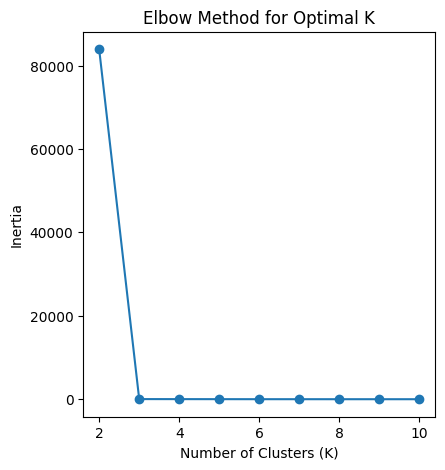

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
max_clusters = 10  # You can adjust this based on your preference

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(credit_scores_for_clustering)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(credit_scores_for_clustering, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

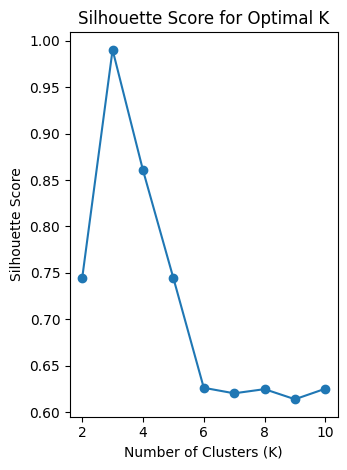

In [ ]:
# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


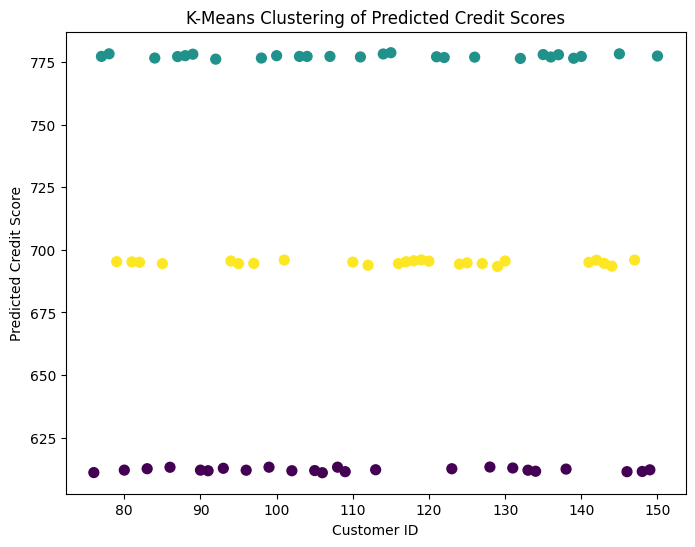

Dataset with Cluster Assignments:
    CustomerID  PredictedCreditScore  Cluster
0          107            777.199514        1
1           96            612.001042        0
2          142            695.835564        2
3          122            776.754025        1
4          131            612.886528        0
..         ...                   ...      ...
70          82            695.017533        2
71         100            777.487352        1
72         109            611.414380        0
73          79            695.248902        2
74         135            777.932841        1

[75 rows x 3 columns]


In [ ]:
# Apply K-Means clustering with the optimal number of clusters (3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
new_data['Cluster'] = kmeans.fit_predict(credit_scores_for_clustering)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(new_data['CustomerID'], new_data['PredictedCreditScore'], c=new_data['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Predicted Credit Scores')
plt.xlabel('Customer ID')
plt.ylabel('Predicted Credit Score')
plt.show()

# Display the dataset with cluster assignments
print("Dataset with Cluster Assignments:")
print(new_data[['CustomerID', 'PredictedCreditScore', 'Cluster']])


In [ ]:
print(new_data)

    CustomerID  Income   Debt  PaymentHistory  PredictedCreditScore  Cluster
0          107   55000  10000               0            777.199514        1
1           96   65000  12000               2            612.001042        0
2          142   90000   8000               1            695.835564        2
3          122   60000  15000               0            776.754025        1
4          131   75000   7000               2            612.886528        0
..         ...     ...    ...             ...                   ...      ...
70          82   50000   5000               1            695.017533        2
71         100   85000  15000               0            777.487352        1
72         109   45000  12000               2            611.414380        0
73          79   70000   8000               1            695.248902        2
74         135   80000  10000               0            777.932841        1

[75 rows x 6 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Load the historical customer preferences data
historical_data_path = "/content/rating.csv"  # Replace with the actual path
historical_data = pd.read_csv(historical_data_path)

# Merge historical data with cluster assignments
clustered_data = pd.merge(new_data[['CustomerID', 'Cluster']], historical_data, on='CustomerID')

# Recommendation function based on cluster and historical data
def recommend_items(cluster, num_items=3):
    cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
    top_items = cluster_data.groupby('ItemID')['Rating'].mean().sort_values(ascending=False).index[:num_items]
    return top_items




In [ ]:
# Recommendation function based on cluster and historical data
def recommend_items(cluster, num_items=3):
    cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
    top_items = cluster_data.groupby('ItemID')['Rating'].mean().sort_values(ascending=False).index[:num_items]
    return top_items

# Example: Get recommendations for customers in Cluster 0
cluster_0_recommendations = recommend_items(0)
print("\nRecommendations for Cluster 0:")
print(cluster_0_recommendations)

# Example: Get recommendations for customers in Cluster 1
cluster_1_recommendations = recommend_items(1)
print("\nRecommendations for Cluster 1:")
print(cluster_1_recommendations)

# Example: Get recommendations for customers in Cluster 2
cluster_2_recommendations = recommend_items(2)
print("\nRecommendations for Cluster 2:")
print(cluster_2_recommendations)


Recommendations for Cluster 0:
Index(['Product_C', 'Product_A', 'Product_B'], dtype='object', name='ItemID')

Recommendations for Cluster 1:
Index(['Product_B', 'Product_A', 'Product_C'], dtype='object', name='ItemID')

Recommendations for Cluster 2:
Index(['Product_C', 'Product_A', 'Product_B'], dtype='object', name='ItemID')


In [ ]:
print(clustered_data)

    CustomerID  Cluster     ItemID  Rating
0          107        1  Product_B       4
1           96        0  Product_B       1
2          142        2  Product_A       2
3          122        1  Product_C       5
4          131        0  Product_C       4
..         ...      ...        ...     ...
70          82        2  Product_A       4
71         100        1  Product_C       3
72         109        0  Product_C       4
73          79        2  Product_A       5
74         135        1  Product_B       2

[75 rows x 4 columns]


In [ ]:
# input information for a new customer
new_customer_info = pd.DataFrame({
    'CustomerID': [699],
    'Income': [60000],
    'Debt': [10000],
    'PaymentHistory': ['Excellent'],
})

# Preprocess the new customer information
new_customer_info['PaymentHistory'] = label_encoder.transform(new_customer_info['PaymentHistory'])
new_customer_scaled = scaler.transform(new_customer_info.drop(columns=['CustomerID']))

# Predict the credit score for the new customer using the trained regression model
new_customer_predicted_score = regression_model.predict(new_customer_scaled)

# Add the predicted credit score to the new customer information
new_customer_info['PredictedCreditScore'] = new_customer_predicted_score

# Display the new customer information with predicted credit score
print("\nNew Customer Information with Predicted Credit Score:")
print(new_customer_info)

# Extract the predicted credit score for clustering
new_customer_credit_score_for_clustering = new_customer_info['PredictedCreditScore'].values.reshape(-1, 1)

# Assign the new customer to a cluster using the trained K-Means model
new_customer_cluster = kmeans.predict(new_customer_credit_score_for_clustering)[0]

# Display the assigned cluster for the new customer
print("\nAssigned Cluster for the New Customer:")
print(new_customer_cluster)

# Get personalized recommendations for the new customer's cluster
new_customer_recommendations = recommend_items(new_customer_cluster)
print("\nPersonalized Recommendations for the New Customer:")
print(new_customer_recommendations)



New Customer Information with Predicted Credit Score:
   CustomerID  Income   Debt  PaymentHistory  PredictedCreditScore
0         699   60000  10000               0             777.34618

Assigned Cluster for the New Customer:
1

Personalized Recommendations for the New Customer:
Index(['Product_B', 'Product_A', 'Product_C'], dtype='object', name='ItemID')
